In [54]:
import copy
from dataclasses import dataclass

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 100

In [55]:
def ExplicitRungeKuttaFourthOrder(f: callable, X: np.array, dt: float):
    k1 = f(X)
    k2 = f(X + k1 * dt / 2)
    k3 = f(X + k2 * dt / 2)
    k4 = f(X + k3 * dt)
    X += dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return X

In [69]:
f = lambda point: np.exp((-np.power(np.linalg.norm(point-0.5), 2)) / (0.5/2)**2) * 100
import plotly.graph_objects as go
n, m = 100, 100

# ng = lambda i, j: noise_generator([i/n, j/m]) * 10 + 6
noise = np.array([[f(np.array([i/n, j/n])) for j in range(n)] for i in range(n)])

fig = go.Figure(data=[
    go.Surface(z=noise)
    ])
fig.update_layout(title='surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [74]:
def F(X: np.array) -> np.array:

    f = lambda point: np.exp((-np.power(np.linalg.norm(point-0.5), 2)) / (0.5/2)**2) * 100

    N: int = X.shape[0] // 4
    res = np.zeros(4*N)

    for i in range(0, N):
        res[i] = X[N + i]
    
    for i in range(N, 2*N):
        for j in range(0, N):
            if j == i - N:
                continue
            else:
                xa, ya = X[j], X[j + 2*N]
                xb, yb = X[i - N], X[i + N]
                middleX = (xa + xb) / 2
                middleY = (ya + yb) / 2
                distance = np.sqrt(np.power(xa - xb, 2) + np.power(ya - yb, 2))
                a = -(xa - xb) / f(np.array([middleX, middleY])) / distance ** 4
                res[i] += a
                xxxxx = 1
    
    for i in range(2*N, 3*N):
        res[i] = X[N + i]
    
    for i in range(3*N, 4*N):
        for j in range(0, N):
            if j == i - 3*N:
                continue
            else:
                xa, ya = X[j], X[j + 2*N]
                xb, yb = X[i - 3*N], X[i - N]
                middleX = (xa + xb) / 2
                middleY = (ya + yb) / 2
                distance = np.sqrt(np.power(xa - xb, 2) + np.power(ya - yb, 2))
                a = -(ya - yb) / f(np.array([middleX, middleY])) / distance ** 4
                res[i] += a
                xxxxx = 1
    
    return res

C:\Users\karra\AppData\Local\Temp/ipykernel_17772/3240420192.py:21: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\karra\AppData\Local\Temp/ipykernel_17772/3240420192.py:22: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\karra\AppData\Local\Temp/ipykernel_17772/3240420192.py:21: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\karra\AppData\Local\Temp/ipykernel_17772/3240420192.py:38: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\karra\AppData\Local\Temp/ipykernel_17772/3240420192.py:39: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\karra\AppData\Local\Temp/ipykernel_17772/3240420192.py:38: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\karra\AppData\Local\Temp/ipykernel_17772/3240420192.py:18: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\karra\AppData\Local\Temp/ipykernel_17772/3240420192.py:19: RuntimeWarning:

invalid value

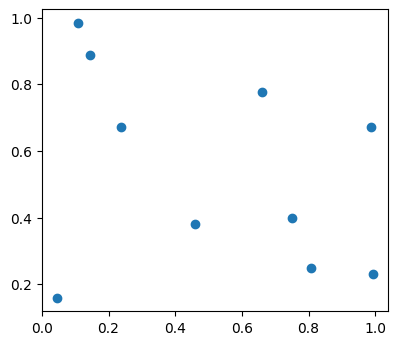

[array([6.60002414e-01, 8.06000626e-01, 9.88207757e-01, 7.49264961e-01,
        4.60118331e-01, 1.08769736e-01, 9.91963648e-01, 4.68645663e-02,
        2.36186878e-01, 1.44631189e-01, 6.54083473e-03, 2.37726718e-04,
        8.10236217e-03, 6.87002924e-03, 4.37436455e-03, 1.72915489e-03,
        6.93545171e-03, 3.55912629e-03, 7.12868884e-03, 4.28399065e-03,
        7.76884148e-01, 2.48044112e-01, 6.72802200e-01, 3.98565791e-01,
        3.81027420e-01, 9.83598199e-01, 2.30205141e-01, 1.60027878e-01,
        6.72153833e-01, 8.88412673e-01, 5.46294359e-03, 9.43073287e-03,
        7.63045597e-03, 6.62483585e-03, 2.22758515e-03, 4.75839614e-03,
        4.14824639e-03, 8.76183506e-03, 2.28756308e-03, 4.18239696e-03]),
 array([ nan,  nan,  nan,  nan,  nan, -inf,  nan,  nan,  nan,  inf,  nan,
         nan,  nan,  nan,  nan, -inf,  nan,  nan,  nan,  inf,  nan,  nan,
         nan,  nan,  nan,  inf,  nan,  nan,  nan, -inf,  nan,  nan,  nan,
         nan,  nan,  inf,  nan,  nan,  nan, -inf]),
 arr

In [75]:
N = 10
X = np.concatenate(
    (
        np.random.rand(N),
        np.random.rand(N)/100,
        np.random.rand(N),
        np.random.rand(N)/100
    )
)
plt.scatter(X[0:N], X[2*N:3*N])
plt.gca().set_aspect('equal', adjustable='box')

T = 2
dt = 1

Fs = list()
Fs.append(X.copy())
t = 0
while t < T:
    X = ExplicitRungeKuttaFourthOrder(F, X, dt)
    Fs.append(X.copy())
    t += dt

X = Fs[-1]
plt.scatter(X[0:N], X[2*N:3*N])
plt.show()

Fs

[6.36870678e-01 9.29853005e-01 1.86901014e-01 2.34845591e-02
 8.40991546e-02 6.19538224e-02 4.64352127e-01 9.67299023e-01
 6.54641750e-01 6.19231452e-01 3.31645201e-03 4.82505301e-03
 8.59149177e-04 5.18000828e-03 2.21269618e-04 5.93438106e-03
 3.70179527e-03 6.11779903e-03 7.43787959e-03 7.45376667e-03
 6.17039616e-01 3.56277462e-01 1.50981876e-01 9.31549265e-02
 8.09306786e-01 1.51013611e-01 9.81018584e-01 3.76719632e-01
 1.13474365e-01 6.03467665e-01 2.09609554e-03 7.40146233e-05
 6.97049588e-04 6.36496385e-03 8.44756859e-03 1.27586417e-03
 1.77314851e-03 8.72574159e-03 5.91265662e-03 6.53405613e-03]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

MovieWriter imagemagick unavailable; using Pillow instead.


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan

KeyboardInterrupt: 

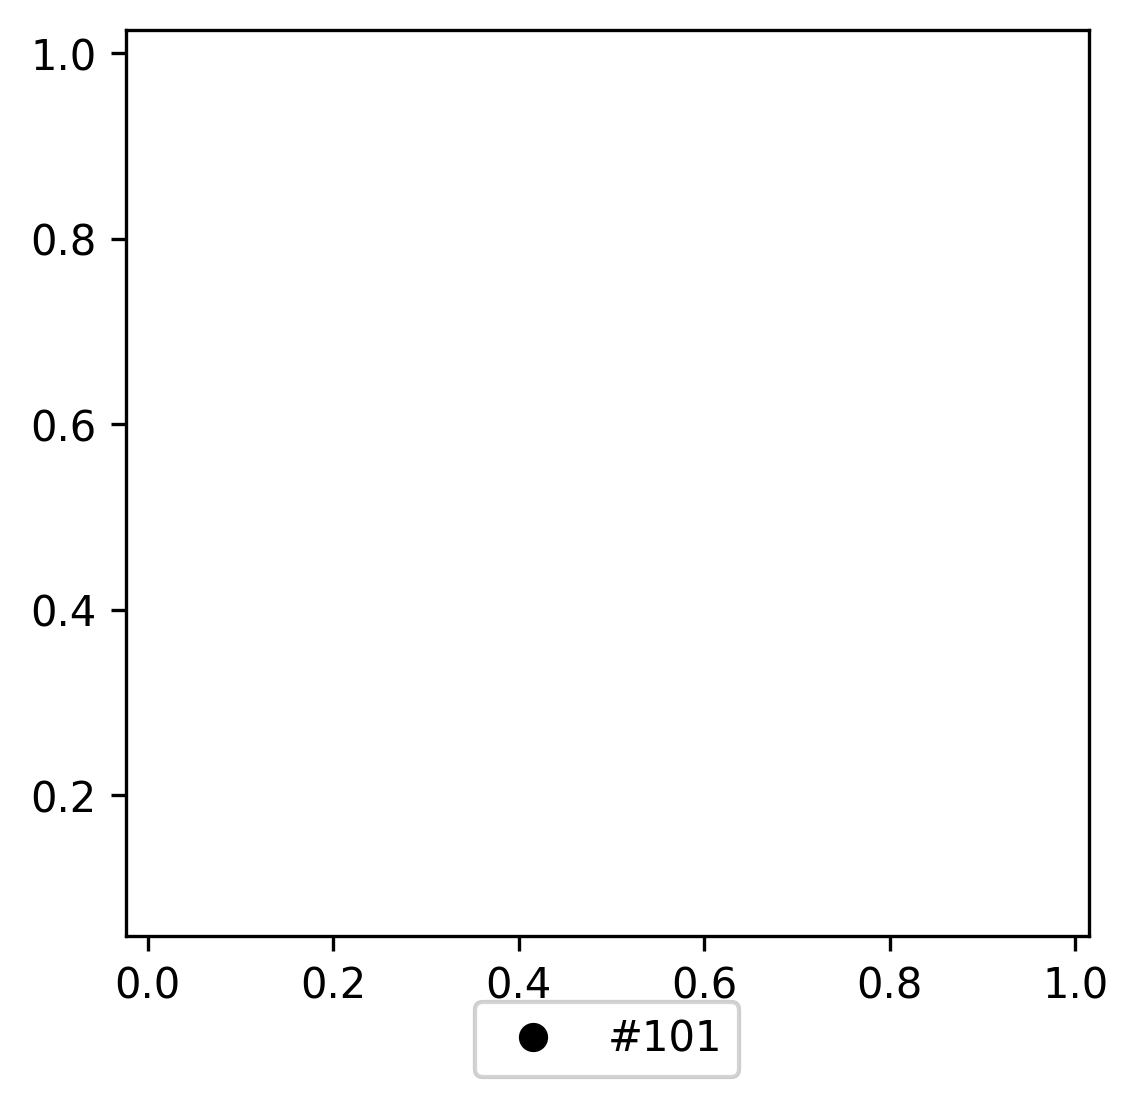

In [46]:
from celluloid import Camera

n, m = 100, 100
# ng = lambda i, j: noise_generator([i/n, j/m]) * 10 + 6
# noise = np.array([[ng(np.array([i/n, j/n])) for j in range(n)] for i in range(n)])
extent = [0, 1, 0, 1]
fig = plt.figure(dpi = 300)
# im = plt.imshow(noise, extent=extent, cmap='RdBu', interpolation='nearest')

plt.gca().set_aspect('equal', adjustable='box')

camera = Camera(fig)
for i, X in enumerate(Fs[:]):
    # tri = ps[0].triangulation
    # points = ps[0].points
    # plt.triplot(points[:,0], points[:,1], tri.simplices, color='grey')
    print(X)
    t = plt.plot(X[0:N], X[2*N:3*N], 'o', color='black')
    # im = plt.imshow(noise, extent=extent, cmap='RdBu', interpolation='nearest')
    # plt.colorbar(im)
    plt.legend(t, [f'#{i}'], loc='upper center', bbox_to_anchor=(0.5, -0.05))
    camera.snap()

animation = camera.animate()
animation.save('evolution_animation.gif', writer = 'imagemagick')

In [13]:
@dataclass
class vectorFunction:
    variables: list[str]
    functions: list[callable]

    def __init__(self, variables, functions):
        if len(variables) != len(functions):
            raise ValueError("variables and functions list size don't match")
        
        self.variables = variables
        self.functions = functions
    
    def __call__(self, X):
        return np.array([f(X) for f in self.functions])

In [3]:
s = 10
r = 28
b = 8/3
f = lambda x, y, z: s*(y-x)
fs = vectorFunction(['x', 'y', 'z'], [lambda point: s*(point[1]-point[0]), lambda point: point[0]*(r-point[2])-point[1], lambda point: point[0]*point[1]-b*point[2]])
fs(np.array([0.1, 0.1, 0.1]))

array([ 0.        ,  2.69      , -0.25666667])

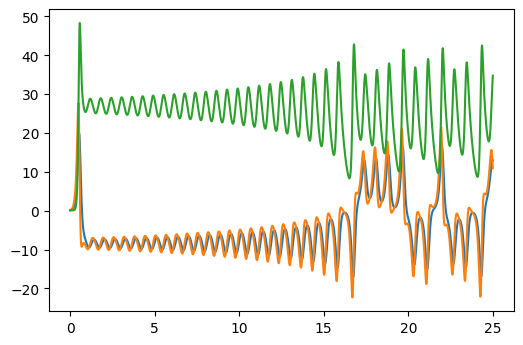

In [10]:
f = lambda point: np.sin(point)

X = np.array([0.1, 0.1, 0.1])

T = 25
dt = 0.01

F = list()
F.append(X)
t = 0
while t < T:
    F.append(ExplicitRungeKuttaFourthOrder(fs, F[-1].copy(), dt))
    t += dt

plt.plot(np.linspace(0, T, int(T/dt) + 1), F)
plt.show()